In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, cumulative_trapezoid

# Cinética de Procesos (Sesión 03)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 3. Dimensionamiento de Reactores en Serie

**Consideraciones generales:**

- Muchas veces, los procesos constan de varios reactores conectados en serie de tal forma que la salida de un reactor alimenta al siguiente reactor en la cadena.

- La dependencia entre $r_{\mathrm{A}}$ y $X$ puede expresarse de varias formas:
    - Empírica a partir de experimentos.
    - Mediante una función que relacione una ley de velocidad de reacción y la conversión.

## 2.1 Ecuaciones para dimensionamiento de reactores ideales

### 2.1.1 Reactores discontinuos (BR)

Para el reactor discontinuo, se considera la hipótesis de mezclado perfecto en el reactor, i.e., no existen gradientes de composición, temperatura, velocidad de reacción, etc. en el reactor.

Para el caso ideal, el dimensionamiento de los reactores tipo batch está gobernado por el tamaño de lote que se desea producir. 

$$t = N_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}} V}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$N_{\mathrm{A_0}}$**: Cantidad inicial del reactivo limitante en el reactor, $[\mathrm{mol}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales:**

- Para casos de volumen constante, el término $V$ se puede sacar de la integral, y en estos casos el término fuera de la integral tendra unidades de concentración: $\frac{N_{\mathrm{A_0}}}{V}$ $[\mathrm{mol.m^{-3}}]$.

### 2.1.2 Reactor continuo agitado (CSTR)

Para el reactor continuo agitado, se consideran las hipótesis de operación en régimen estacionario y de mezclado perfecto en el reactor, i.e., los flujos de entrada y salida son iguales, y no existen gradientes de composición, temperatura, velocidad de reacción, etc. en el reactor.

El volumen del reactor se calcula mediante la ecuación algebráica reproducida debajo:

$$V = \frac{F_{\mathrm{A}_0}}{-r_{\mathrm{A}}}X$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$F_{\mathrm{A_0}}$**: Flujo molar del reactivo limitante a la entrada del reactor, $[\mathrm{mol.s^{-1}}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales**:

- El término $F_{\mathrm{A_0}}$ se considera como constante (hipótesis de operación en régimen estacionario).

- Para un volumen dado, existiran únicamente un par de valores $[r_{\mathrm{A}}, X]$, que satisfacen la ecuación (hipótesis de reactor perfectamente agitado).

### 2.1.3 Reactor Flujo Pistón (PFR)

Para el reactor de flujo pistón, se consideran las hipótesis de operación, i.e., los flujos de entrada y salida son iguales.

Por definición, pueden existir gradientes de composición, temperatura, velocidad de reacción, etc. sobre el volumen del reactor. Una hipótesis recurrente es considerar que solo existen gradientes sobre el eje axial del reactor.

El volumen del reactor se calcula mediante la ecuación integral reproducida debajo:

$$V = F_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$V$**: Volumen del reactor CSTR, $[\mathrm{m^{3}}]$.

- **$F_{\mathrm{A_0}}$**: Flujo molar del reactivo limitante a la entrada del reactor, $[\mathrm{mol.s^{-1}}]$.

- **$X$**: Conversión del reactivo limitante.

- **$r_{\mathrm{A}}$**: Tasa de reacción del reactivo limitante $\mathrm{A}$ por unidad de volumen, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

</div>

</details>

**Consideraciones adicionales**:

- El término $F_{\mathrm{A_0}}$ se considera como constante (hipótesis de operación en régimen estacionario).

- Para un volumen dado, existen gradientes de conversión dentro del reactor, por lo que se debe resolver la integral definida por algún método: gráfico, analítico o numérico.

## 2.2 Gráfica de Levenspiel

### 2.2.1 Conceptualización

El gráfico de Levenspiel es una herramienta que permite dimensionar reactores tipo CSTR y tipo PFR que operan en régimen estacionario, en función del flujo molar en el sistema y la tasa de conversión deseada, a condición que se tengan datos de mediciones de la tasa de velocidad de reacción en función de la conversión.

En la ***Tabla 1*** se recapitulan las ecuaciones de diseño para los reactores de flujo continuo tipo CSTR y PFR, en términos de la conversión $X$. Para ambos casos, el volumen de reactor es proporcional al flujo molar $F_{\mathrm{A_0}}$, $[\mathrm{mol.s^{-1}}]$; e inversamente proporcional a la tasa de reacción $r_{\mathrm{A}}$, $[\mathrm{mol.m^{-3}.s^{-1}}]$.

<center>

***Tabla 1. Ecuaciones de diseño para reactores CSTR y PFR, en términos de la conversión*** 

| Reactor| Acrónimo | Ecuación de diseño | Esquema |
|---------|---------|--------------------|:-------:|
| Reactor continuo agitado | CSTR    | $$V = \frac{F_{\mathrm{A}_0}}{-r_{\mathrm{A}}}X$$ | <img src="figures/images/Continuous_bach_reactor_CSTR.svg" style="width:100px" title="Continuous Stirred Tank Reactor"> |
| Reactor de flujo pistón | PFR    | $$V = F_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$ | <img src="figures/images/ReactorPlugFlow.svg" style="width:200px" title="Plug Flow Reactor"> | 

</center>

Para la construcción de un gráfico de Levenspiel, como los que se muestran en la ***Figura 1***, se siguen las siguientes etapas:

1. Graficar los datos experimentales:
    - Eje horizontal: Conversión, $X$.
    - Eje vertical: Flujo molar entre el negativo de la tasa de reacción $\frac{F_{\mathrm{A_0}}}{-r_{\mathrm{A}}}$ $[\mathrm{m^{3}}]$.

2. Estimar el volumen del reactor, de acuerdo con las especificidades de cada tipo de reactor:
    - CSTR: El volumen está dado por el área del rectángulo cuya base es la conversión deseada $X$, y cuya altura es el valor de $\frac{F_{\mathrm{A_0}}}{-r_{\mathrm{A}}}$ que le corresponda.
    - PFR: El volumen está dado por el área bajo la curva $\frac{F_{\mathrm{A_0}}}{-r_{\mathrm{A}}}$ vs $X$, para la conversión deseada $X$. 

<center>

<img src="figures/images/levenspiel.png" style="width:800px" title="Levenspiel plots">

***Figura 1: Gráfico de Levenspiel para el dimensionamiento de un reactor. Adaptado de [Fogler, 2017, pp. 39-47]***

</center>


<div class="alert alert-warning">

<center>

**¿Cómo se pueden estimar las áreas en un gráfico de Levenspiel?**

</center>



</div>

### 2.2.2 Ejemplo de aplicación

Adaptado de: ***[Fogler, 2017, pp. 39-47]***

Considere la reacción isotérmica de isomerización de una fase gaseosa:

$$\mathrm{A \longrightarrow B}$$

Estime el volumen de los reactores CSTR y PFR que se requieren para obtener las distintas conversiones que se muestran en la ***Tabla 2***, considerando que el flujo molar en el reactor a dimensionar será  $F_{\mathrm{A_0}}=0.4$ $[\mathrm{mol.s^{-1}}]$, y las mediciones de laboratorio de tasa de reacción en función de la conversión que se muestran en la ***Tabla 2***, y que fueron obtenidas en condiciones de temperatura $T=500$ $\mathrm{K}$ y presión $P=8.2$ $\mathrm{atm}$. 

<center>

***Tabla 2. Datos procesados***

| $$X$$ | 0 | 0.1 | 0.2 | 0.4 | 0.6 | 0.7 | 0.8 |
|----|--|--|--|--|--|--|--|
| $$-r_{\mathrm{A}} \,\, [\mathrm{(mol.m^{-3}).s^{-1}}]$$ | 0.45 | 0.37 | 0.30 | 0.195 | 0.113 | 0.079 | 0.05 |


#### 2.2.2.1 Gráfico de Levenspiel y dimensionamiento de reactores CSTR y PFR

**Solución**

1. Calcular los términos $\frac{1}{-r_{\mathrm{A}}}$  y $\frac{F_{\mathrm{A_0}}}{-r_{\mathrm{A}}}$.

In [2]:
# Entrada
FA0 = 0.4 # [mol.s-1]
X = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8]) # dimless
rA = -1. * np.array([0.45, 0.37, 0.30, 0.195, 0.113, 0.079, 0.05]) # [(mol.m-3).s-1]

# Creación de DataFrame con datos de interés
df = pd.DataFrame({"X": X, '-rA': -rA})
df['1/-rA'] = 1/df['-rA'] # [(mol-1.m3).s]
df['F/-rA'] = FA0 * df['1/-rA'] # [m3]

display(df)

,X,-rA,1/-rA,F/-rA
0,0.0,0.450,2.222222,0.888889
1,0.1,0.370,2.702703,1.081081
2,0.2,0.300,3.333333,1.333333
3,0.4,0.195,5.128205,2.051282
4,0.6,0.113,8.849558,3.539823
5,0.7,0.079,12.658228,5.063291
6,0.8,0.050,20.000000,8.000000


2. Construir los gráficos de Levenspiel

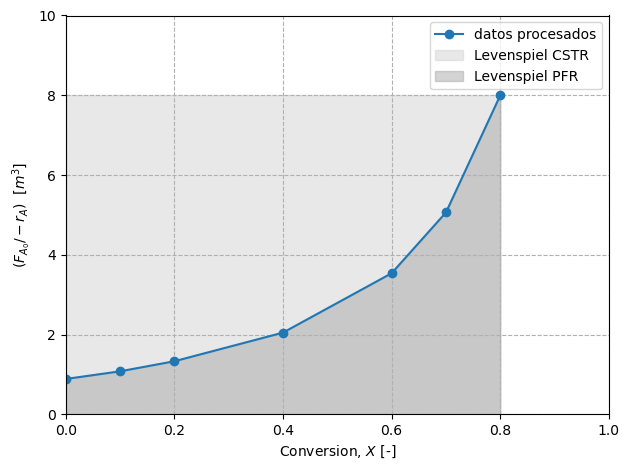

In [3]:
fig, ax = plt.subplots()
x = df["X"].to_numpy()
y = df["F/-rA"].to_numpy()
ax.plot(x, y, ls='-', marker='o', label='datos procesados') # datos procesados
ax.fill_between(x, y[-1]*np.ones_like(x), label='Levenspiel CSTR', color='lightgray', alpha=0.5) # Levenspiel para CSTR
ax.fill_between(x, y, label='Levenspiel PFR', color='darkgray', alpha=0.5) # Levenspiel para PFR

ax.set(xlim=(0, 1), ylim=(0, 10),xlabel=r'Conversion, $X$ [-]', ylabel=r'$(F_{A_0}/-r_{A})$  [$m^3$]')
ax.legend()
ax.grid(ls="--")
fig.tight_layout()
plt.show()

3. Estimar los volúmenes de los reactores (gráficamente o con un método numérico)

In [4]:
# Estimación volúmenes CSTR
df["Vcstr"] = df["X"] * df["F/-rA"] #m3

# Estimacion de volúmenes PFR
df["Vpfr(trapz)"] = 0.0
df["Vpfr(simps)"] = 0.0
for idx, row in df.iterrows():
    if idx > 0:
        x = df.loc[:idx, 'X'] # X
        y = df.loc[:idx, 'F/-rA'] # (F/-rA)
        df.at[idx, 'Vpfr(trapz)'] = trapezoid(y, x)
        df.at[idx, 'Vpfr(simps)'] = simpson(y, x)

display(df[["X", "-rA", "Vcstr", "Vpfr(trapz)", "Vpfr(simps)"]])

,X,-rA,Vcstr,Vpfr(trapz),Vpfr(simps)
0,0.0,0.450,0.000000,0.000000,0.000000
1,0.1,0.370,0.108108,0.098498,0.098498
2,0.2,0.300,0.266667,0.219219,0.218218
3,0.4,0.195,0.820513,0.557681,0.551937
4,0.6,0.113,2.123894,1.116791,1.090104
5,0.7,0.079,3.544304,1.546947,1.515931
6,0.8,0.050,6.400000,2.200112,2.149870


#### 2.2.2.2 Perfiles de conversión y velocidad de reacción en reactores CSTR y PFR


<div class="alert alert-warning">

<center>

Para casos isotérmicos, generalmente a conversión equivalente, el volumen de un reactor CSTR es mayor al de un reactor PFR. 

¿Por qué sucede esto?

</center>



</div>

A partir de los datos calculados se pueden trazar perfiles de conversión y de velocidad de reacción para reactores CSTR, y a lo largo del volumen de reactores PFR.

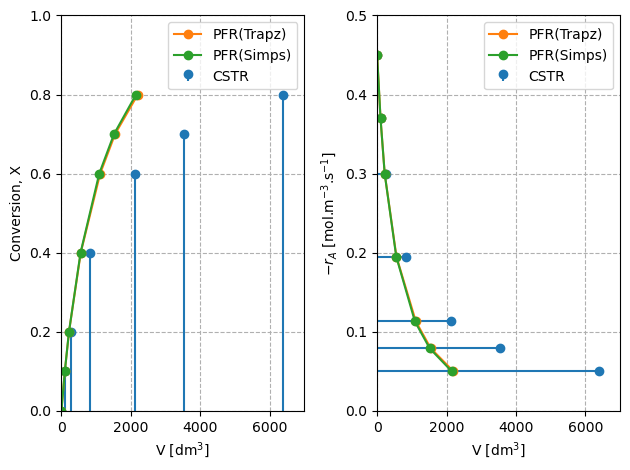

In [5]:
fig, axes = plt.subplots(ncols=2, sharex=True)

x0 = 1e3*df['Vcstr'].to_numpy()  # Volume CSTR in dm3
x1, x2 = 1e3*df['Vpfr(trapz)'].to_numpy(), 1e3*df['Vpfr(simps)'].to_numpy() # Volume PFR in dm3
y1 = df['X'].to_numpy() # conversion X [-]
y2 = df['-rA'].to_numpy() # reaction rate [(mol.m-3).s-1]

axes[0].stem(x0, y1, linefmt='-', markerfmt='o', basefmt='None', orientation='vertical', label='CSTR')
axes[0].plot(x1, y1, ls='-', marker='o', label='PFR(Trapz)')
axes[0].plot(x2, y1, ls='-', marker='o', label='PFR(Simps)')
axes[0].set(xlim=(0, 2500), ylim=(0, 1), xlabel=r'V [dm$^3$]', ylabel='Conversion, X')

axes[1].stem(y2, x0, linefmt='-', markerfmt='o', basefmt='None', orientation='horizontal', label='CSTR')
axes[1].plot(x1, y2, ls='-', marker='o', label='PFR(Trapz)')
axes[1].plot(x2, y2, ls='-', marker='o', label='PFR(Simps)')
axes[1].set(xlim=(0, 7000), ylim=(0, 0.5), xlabel=r'V [dm$^3$]', ylabel=r'$-r_{A}$ [mol.m$^{-3}$.s$^{-1}$]')

for ax in axes:
    ax.grid(ls="--")
    ax.legend()

fig.tight_layout()
plt.show()

**Reactores CSTR:**

Como consecuencia de la hipótesis de mezclado perfecto, los reactores CSTR siempre operan a la tasa de reacción más baja (la tasa a la salida).

**Reactores PFR:**

En un reactor PFR, la tasa de reacción es grande a la entrada del reactor y disminuye de forma gradual a medida que un elemento se acerca a la salida, donde la tasa de reacción es baja. Este comportamiento es típico para reactores en régimen de operación isotérmico.


<div class="alert alert-warning">

<center>

**Si bien este comportamiento es general para reacciones isotérmicas, existen excepciones como el caso de reacciones autocatalíticas, reacciones no isotérmicas, etc.**

</center>



</div>

# Referencias

- ***[Fogler, 2016]***: Fogler, H. S. (2016) Elements of Chemical Reaction Engineering (5th ed.). Prentice Education Inc.